<a href="https://colab.research.google.com/github/nurilhaidar/Machine-Learning/blob/main/Mukhammad_Nuril_Haidar_Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>TUGAS 1<h1>**

In [11]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.6168 - accuracy: 0.7853 - val_loss: 0.8450 - val_accuracy: 0.7233
Epoch 2/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.5873 - accuracy: 0.7921 - val_loss: 0.8739 - val_accuracy: 0.7239
Epoch 3/20
1563/1563 [==============================] - 85s 55ms/step - loss: 0.5706 - accuracy: 0.8013 - val_loss: 0.8590 - val_accuracy: 0.7194
Epoch 4/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.5434 - accuracy: 0.8070 - val_loss: 1.0056 - val_accuracy: 0.7116
Epoch 5/20
1563/1563 [==============================] - 81s 52ms/step - loss: 0.5225 - accuracy: 0.8153 - val_loss: 0.9149 - val_accuracy: 0.7203
Epoch 6/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.5072 - accuracy: 0.8216 - val_loss: 0.9081 - val_accuracy: 0.7188
Epoch 7/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.4803 - accuracy: 0.8289 - val_loss: 0.9275 -

313/313 - 5s - loss: 1.2069 - accuracy: 0.7203 - 5s/epoch - 16ms/step


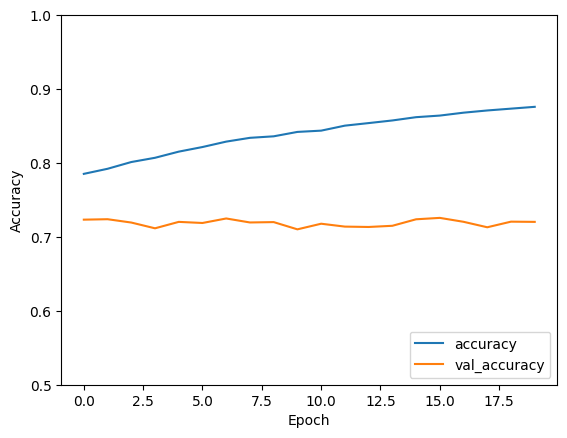

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [24]:
print(test_acc)

0.720300018787384


**<h1>TUGAS 2<h1>**

In [25]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [26]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1448 - accuracy: 0.9550 - val_loss: 0.0611 - val_accuracy: 0.9800
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 3/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0352 - val_accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0333 - val_accuracy: 0.9889
Epoch 5/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0326 - val_accuracy: 0.9900


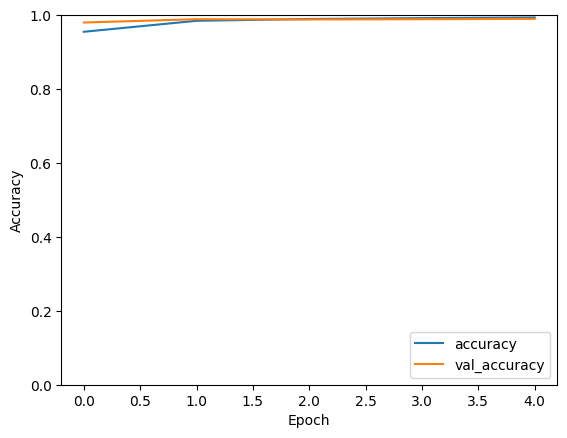

313/313 - 3s - loss: 0.0326 - accuracy: 0.9900 - 3s/epoch - 11ms/step


In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [33]:
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.9900000095367432
